<Figure size 432x288 with 0 Axes>

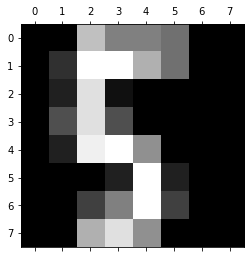

In [1]:
# NN_Multiclass_NumpyImplementation

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

%matplotlib inline

dig = load_digits()
plt.gray()
plt.matshow(dig.images[25])

onehot_target = pd.get_dummies(dig.target)

x_train, x_val, y_train, y_val = train_test_split(dig.data, onehot_target, test_size=0.1, random_state=20)
# shape of x_train :(1617, 64)
# shape of y_train :(1617, 10)

In [2]:
print(x_train)

[[ 0.  0.  6. ...  6.  0.  0.]
 [ 0.  0.  7. ... 16. 16. 13.]
 [ 0.  4. 15. ... 16.  9.  0.]
 ...
 [ 0.  0. 15. ...  0.  0.  0.]
 [ 0.  0.  0. ... 15. 10.  0.]
 [ 0.  0.  8. ... 15.  1.  0.]]


In [3]:
print(y_train)

      0  1  2  3  4  5  6  7  8  9
669   0  0  0  1  0  0  0  0  0  0
1143  0  0  1  0  0  0  0  0  0  0
1211  0  0  1  0  0  0  0  0  0  0
904   0  0  0  0  0  0  0  0  0  1
974   1  0  0  0  0  0  0  0  0  0
...  .. .. .. .. .. .. .. .. .. ..
924   0  0  0  0  0  0  0  0  0  1
1247  0  1  0  0  0  0  0  0  0  0
271   0  0  0  0  0  1  0  0  0  0
474   0  0  0  0  0  0  1  0  0  0
1379  0  0  0  0  0  0  0  0  0  1

[1617 rows x 10 columns]


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

dig = load_digits()
onehot_target = pd.get_dummies(dig.target)
x_train, x_val, y_train, y_val = train_test_split(dig.data, onehot_target, test_size=0.1, random_state=20)

print(y_val)

      0  1  2  3  4  5  6  7  8  9
130   1  0  0  0  0  0  0  0  0  0
1174  0  0  0  0  0  0  0  1  0  0
265   0  0  0  0  0  0  0  0  0  1
531   0  0  0  0  0  1  0  0  0  0
309   0  0  0  0  0  0  0  0  1  0
...  .. .. .. .. .. .. .. .. .. ..
470   0  0  1  0  0  0  0  0  0  0
255   0  0  0  0  0  0  0  0  1  0
694   1  0  0  0  0  0  0  0  0  0
1509  0  0  0  0  0  0  0  1  0  0
954   0  0  0  0  0  0  0  1  0  0

[180 rows x 10 columns]


In [5]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

class MyNN:
    def __init__(self, x, y):
        self.x = x
        neurons = 128
        self.lr = 0.5
        ip_dim = x.shape[1]
        op_dim = y.shape[1]

        self.w1 = np.random.randn(ip_dim, neurons)
        self.b1 = np.zeros((1, neurons))
        self.w2 = np.random.randn(neurons, neurons)
        self.b2 = np.zeros((1, neurons))
        self.w3 = np.random.randn(neurons, op_dim)
        self.b3 = np.zeros((1, op_dim))
        self.y = y

    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = softmax(z3)
        
    def backprop(self):
        loss = error(self.a3, self.y)
        print('Error :', loss)
        a3_delta = cross_entropy(self.a3, self.y) # w3
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * sigmoid_derv(self.a2) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1

        self.w3 -= self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 -= self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0)
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)

    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a3.argmax()
			
model = MyNN(x_train/16.0, np.array(y_train))

epochs = 1500
for x in range(epochs):
    model.feedforward()
    model.backprop()
		
def get_acc(x, y):
    acc = 0
    for xx,yy in zip(x, y):
        s = model.predict(xx)
        if s == np.argmax(yy):
            acc +=1
    return acc/len(x)*100
	
print("Training accuracy : ", get_acc(x_train/16, np.array(y_train)))
print("Test accuracy : ", get_acc(x_val/16, np.array(y_val)))

Error : 11.333544893343893
Error : 9.505587539633778
Error : 6.665995207854028
Error : 5.662859970165334
Error : 3.761931519198455
Error : 3.0829306712532727
Error : 2.454974837070371
Error : 2.4130812195689937
Error : 1.5478454664686438
Error : 1.194075659220681
Error : 1.1360130743605252
Error : 0.8933819720989917
Error : 0.8715450429852509
Error : 0.8376528570852633
Error : 0.8204874470342705
Error : 0.7706017121222563
Error : 0.7642707907878948
Error : 0.7360721685147924
Error : 0.7286405327166353
Error : 0.7425027674069675
Error : 0.6849239748170536
Error : 0.699496599173988
Error : 0.6329249652115924
Error : 0.6309334070704096
Error : 0.5725741619764211
Error : 0.5595562416158112
Error : 0.5127835734398937
Error : 0.4967784748174893
Error : 0.46293123379136814
Error : 0.44776027181304645
Error : 0.4248762633385333
Error : 0.41188471784498487
Error : 0.39658163974739497
Error : 0.38596953932975997
Error : 0.3752385442509754
Error : 0.3666123043707258
Error : 0.35843193256495476
Er

Error : 0.06390137370608583
Error : 0.06369312301363242
Error : 0.0634861138458675
Error : 0.06328033475151612
Error : 0.06307577442142287
Error : 0.06287242168651669
Error : 0.06267026551580625
Error : 0.06246929501440592
Error : 0.06226949942159123
Error : 0.062070868108883924
Error : 0.06187339057816537
Error : 0.06167705645981845
Error : 0.06148185551089699
Error : 0.06128777761332255
Error : 0.0610948127721081
Error : 0.06090295111360783
Error : 0.060712182883792896
Error : 0.06052249844655304
Error : 0.060333888282022664
Error : 0.06014634298493215
Error : 0.05995985326298314
Error : 0.05977440993524783
Error : 0.05959000393059188
Error : 0.05940662628612007
Error : 0.0592242681456455
Error : 0.05904292075818045
Error : 0.0588625754764499
Error : 0.058683223755426436
Error : 0.05850485715088707
Error : 0.058327467317990565
Error : 0.05815104600987603
Error : 0.05797558507628168
Error : 0.05780107646218424
Error : 0.057627512206457544
Error : 0.05745488444055118
Error : 0.05728318

Error : 0.030891934918685544
Error : 0.030833629674301772
Error : 0.03077551428492233
Error : 0.030717587895753174
Error : 0.0306598496571513
Error : 0.030602298724583185
Error : 0.03054493425858358
Error : 0.030487755424714855
Error : 0.030430761393526625
Error : 0.03037395134051573
Error : 0.03031732444608687
Error : 0.030260879895513328
Error : 0.030204616878898336
Error : 0.030148534591136582
Error : 0.03009263223187636
Error : 0.03003690900548193
Error : 0.029981364120996223
Error : 0.029925996792104097
Error : 0.029870806237095777
Error : 0.02981579167883074
Error : 0.029760952344701972
Error : 0.029706287466600454
Error : 0.02965179628088025
Error : 0.02959747802832364
Error : 0.02954333195410687
Error : 0.029489357307765914
Error : 0.029435553343163015
Error : 0.02938191931845311
Error : 0.02932845449605087
Error : 0.029275158142597985
Error : 0.02922202952893065
Error : 0.02916906793004764
Error : 0.029116272625078356
Error : 0.029063642897251492
Error : 0.02901117803386383
Er

Error : 0.01947245000273415
Error : 0.019446668131302514
Error : 0.019420948224958094
Error : 0.01939529007652406
Error : 0.01936969347967689
Error : 0.019344158228942306
Error : 0.019318684119691152
Error : 0.019293270948135283
Error : 0.019267918511323583
Error : 0.019242626607137884
Error : 0.01921739503428895
Error : 0.019192223592312544
Error : 0.019167112081565428
Error : 0.019142060303221443
Error : 0.01911706805926756
Error : 0.019092135152500044
Error : 0.019067261386520547
Error : 0.01904244656573225
Error : 0.019017690495336064
Error : 0.018992992981326822
Error : 0.018968353830489455
Error : 0.018943772850395287
Error : 0.018919249849398273
Error : 0.01889478463663123
Error : 0.018870377022002244
Error : 0.018846026816190863
Error : 0.018821733830644557
Error : 0.018797497877575002
Error : 0.018773318769954517
Error : 0.018749196321512403
Error : 0.01872513034673143
Error : 0.018701120660844266
Error : 0.01867716707982987
Error : 0.01865326942041012
Error : 0.01862942750004

Error : 0.013909833434050467
Error : 0.013895953623341787
Error : 0.013882099534022092
Error : 0.013868271097297514
Error : 0.013854468244609614
Error : 0.013840690907634512
Error : 0.013826939018281938
Error : 0.01381321250869427
Error : 0.013799511311245542
Error : 0.013785835358540641
Error : 0.013772184583414228
Error : 0.013758558918929912
Error : 0.013744958298379288
Error : 0.013731382655280951
Error : 0.013717831923379772
Error : 0.013704306036645787
Error : 0.013690804929273366
Error : 0.013677328535680332
Error : 0.013663876790507047
Error : 0.0136504496286155
Error : 0.013637046985088441
Error : 0.013623668795228463
Error : 0.013610314994557155
Error : 0.013596985518814214
Error : 0.013583680303956562
Error : 0.01357039928615744
Error : 0.013557142401805642
Error : 0.013543909587504533
Error : 0.01353070078007127
Error : 0.013517515916535928
Error : 0.013504354934140627
Error : 0.013491217770338721
Error : 0.013478104362793899
Error : 0.013465014649379421
Error : 0.013451948

Error : 0.010783908647249133
Error : 0.0107752708120761
Error : 0.010766645889252321
Error : 0.010758033850634209
Error : 0.010749434668158413
Error : 0.010740848313841613
Error : 0.010732274759780213
Error : 0.010723713978150059
Error : 0.010715165941206155
Error : 0.010706630621282428
Error : 0.010698107990791433
Error : 0.010689598022224023
Error : 0.010681100688149175
Error : 0.010672615961213643
Error : 0.010664143814141734
Error : 0.010655684219734998
Error : 0.010647237150872015
Error : 0.010638802580508058
Error : 0.010630380481674882
Error : 0.010621970827480433
Error : 0.010613573591108642
Error : 0.010605188745819026
Error : 0.0105968162649466
Error : 0.010588456121901473
Error : 0.010580108290168656
Error : 0.010571772743307829
Error : 0.010563449454953008
Error : 0.010555138398812357
Error : 0.010546839548667869
Error : 0.010538552878375199
Error : 0.010530278361863316
Error : 0.010522015973134308
Error : 0.010513765686263133
Error : 0.010505527475397321
Error : 0.01049730